# Fit Manager Update
Kak W., 2018-09-27

## Objective:

 - Try out Josh's Fit Manager
 - Fit with Crystal Ball function
 - Make custom Crystal Ball pdf class
 - Compile and Fit
 - Incorporate the above into Josh's code

## Import Samples

- path: `/data/users/kakw/Resonances/LepGamma_elg_newblind_2018_09_23_beta`
- apply blinding to strict signal region: 
    - MET>25 and
    - leading photon passing:
        - Pixel Veto, and
        - CSEV

### Sample Pre-selection
- Trigger: HLT_Ele27_eta2p1_WPTight_Gsf
- Overlap removal with dR<0.4, in the preference of muon over electron over photon over jets
- at least 1 photon object and only 1 electron object required
- no muons in sample
- cut-based working points
- photon: medium, pT>20  
- electron: medium, pT>10 (will move to tight?)
- muon: tight, pT> 25

### Signal region cuts (e channel)

 - photon pT > 50
 - inverse Z mass cut (Width=15?)
 - photon passing electron veto (Pixel Seed?)
 

In [1]:
cd /home/kakw/efake/WG_Analysis/Plotting

/home/kakw/efake/WG_Analysis/Plotting


In [2]:
 %run interactiveStackTree.py --baseDir  /data/users/kakw/Resonances/LepGamma_elg_newblind_2018_09_23_beta \
--samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py \
--lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root --jupyt --quiet

Welcome to JupyROOT 6.10/05
-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
DYJetsToLL_M-50                xsec : 5.77e+03 pb Nevent : 49144274 lumi : 8.52e+03 scale :     4.21
ZGTo2LG                        xsec :      118 pb Nevent : 9321494  lumi : 7.91e+04 scale :    0.454
TTJets_DiLept                  xsec :     85.7 pb Nevent : 6094476  lumi : 7.11e+04 scale :    0.505
TTJets_SingleLeptFromT         xsec :      179 pb Nevent : 11957043 lumi : 6.69e+04 scale :    0.537
TTJets_SingleLeptFromTbar      xsec :      179 pb Nevent : 46455353 lumi :  2.6e+05 scale :    0.138
TTGJets                        xsec :      3.7 pb Nevent : 1577833  lumi : 4.27e+05 scale :   0.0841
WWTo2L2Nu                      xsec :     12.2 pb Nevent : 1        lumi :   0.0821 scale : 4.37e+05
WGToLNuG-amcatnloFXFX          xsec :      822 pb Nevent : 3235156  lumi : 3.94e+03 scale :     9.12
WGToLNuG-madgraphMLM           xsec :      405 pb Nevent : 6103

In [3]:
base = 'ph_n>=1 && el_n==1'
baseeta = base + ' && abs(ph_eta[0])<1.4'
base1 = 'ph_n==1 && el_n==1'
base1eta = base1 + ' && ph_IsEB[0]'
a4 = '&& ph_hasPixSeed[0]==0'  #Pixel seed
b4 = '&& ph_hasPixSeed[0]==1'
ltmet = '&&met_pt<25'
gtmet = '&&met_pt>25'
phpt50 = "&&ph_pt[0]>50"
unblind = "ph_hasPixSeed[0]==1 || met_pt<25"
weight = "PUWeight*NLOWeight"

In [4]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(1)
from ROOT import RooFit
#samples.change_stack_order("GammaGamma","Wjets") # not working :/

## Prepare fit sample

- e,g mass with barrel photons
- dominated by Z -> ee events with one electron misidentified

In [5]:
cv = samples.Draw("m_lep_ph",base1eta+ltmet+phpt50,(200,0,200),
             {"xlabel":"m(e,#gamma) " , "weight": weight,'normalize':1 })

m_lep_ph : ph_n==1 && el_n==1 && ph_IsEB[0]&&met_pt<25&&ph_pt[0]>50
stack_sum 166373.301665
skipped  <Sample Data at 7f6660f81368>


In [6]:
%jsroot on
samples.curr_canvases["top"].Draw()


In [7]:
%jsroot off

In [8]:
from DrawConfig import DrawConfig
samples.calc_yaxis_limits(DrawConfig("","","",{"normalize":True}))

(0.5, 21656.976872893974)

In [7]:
samplist = samples.get_samples(isActive=True ) 
[(s.name,s.hist.GetMaximum()) for s in samplist if s.hist]

[('Wgamma', 0.00874978809459281),
 ('Z+jets', 0.10743749770506758),
 ('Zgamma', 0.0021034272989482743),
 ('Wjets', 0.000569236067543089),
 ('TTG', 0.0002634360572449901),
 ('GJets', 0.0012039365365846008),
 ('GammaGamma', 0.0048036903660722404),
 ('AllTop', 0.0006310022102951027)]

166373.301665


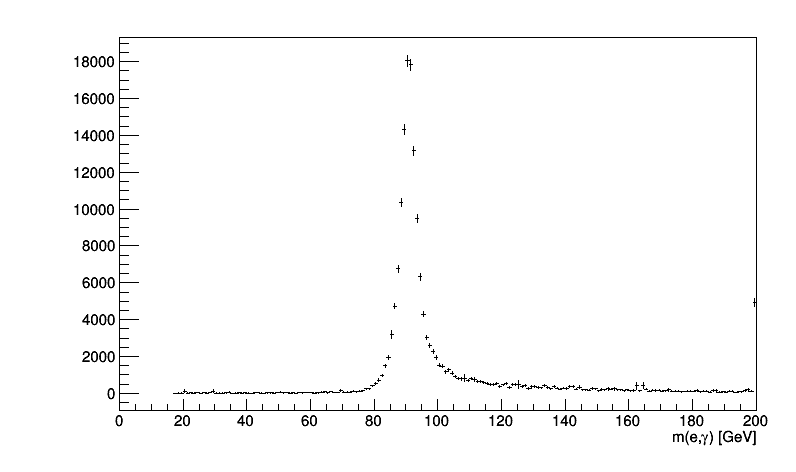

Info in <TCanvas::Print>: png file /tmp/tmpqU_voF.png has been created


In [8]:
samples.get_samples(name='__AllStack__')[0].hist.Draw()
print samples.get_samples(name='__AllStack__')[0].hist.Integral()
samples.curr_canvases["top"]


In [9]:
h1 = samples.get_stack_aggregate()
h1.GetYaxis().SetRangeUser(0.00001,0.15)
h1.Draw('hist')
samples.curr_canvases["top"].SetLogy(1)
print h1.Integral()

1.0


## Shape of Z mass peak

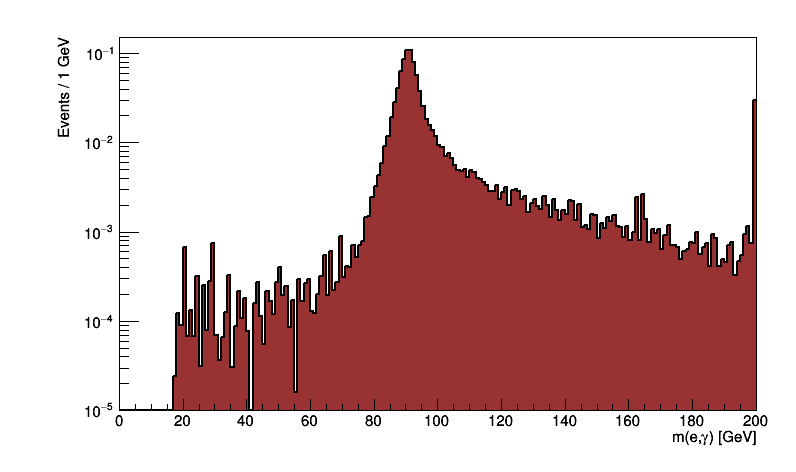

Info in <TCanvas::Print>: png file /tmp/tmpbwNude.png has been created


In [10]:
samples.curr_canvases["top"]

In [13]:
import FitManager; reload(FitManager);from FitManager import FitManager

In [14]:
x = ROOT.RooRealVar("x","x",85,195)
x2 = ROOT.RooRealVar("x","reco mass [GeV]",0,200) #plot range

In [15]:
fm = FitManager("cb", 0,None,h1,"m_lep_ph",None,x2)

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(datahist_): fit range of variable x expanded to nearest bin boundaries: [0,200] --> [0,200]


In [16]:
froo_cb = fm.run_fit((85,195))

In [17]:
samples.curr_canvases["top"].cd()
frame = x2.frame(RooFit.Title("Fit of Z reco mass with electron fakes"))
fm.datahist.plotOn(frame)
fm.func_pdf.plotOn(frame,RooFit.LineColor(2))
frame.SetMinimum(0.0001)
frame.SetMaximum(1)
frame.Draw()

[#1] INFO:InputArguments -- RooAbsData::plotOn(datahist_) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors


In [18]:
#%jsroot on
samples.curr_canvases["top"].SetLogy()

## Crystal Ball function

 - gaussian fit to resonance peak
 - with power-law tail (in high end for us)
 
    $f(x;\alpha,n,x,\sigma) = \begin{cases} \text{exp}\left(-\frac{(x-x_{0})^{2}}{2\sigma^{2}}\right)&\text{for  }x-x_{0}<\alpha\sigma \\ A\left(B-\frac{x-x_{0}}{\sigma}\right)&\text{for  }x-x_{0}\geq\alpha\sigma\end{cases}$
 
 - With A and B fixed so that the pdf is continuous and differentiable at juncture
 - A "double" crystal ball is the version with two power tails

## Crystal Ball: initiation

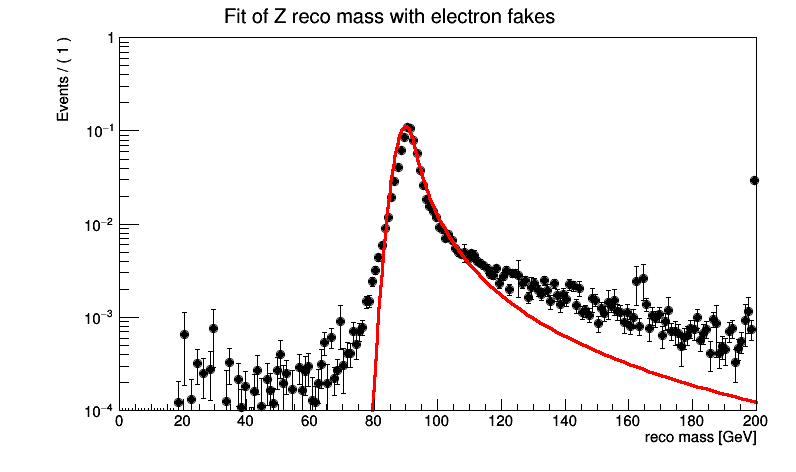

In [20]:
samples.curr_canvases["top"].Draw()

In [21]:
froo_cb = fm.run_fit((85,195),True)

[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'fit' created with bounds [85,195]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_cb__datahist_) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'NormalizationRangeForfit' created with bounds [0,200]
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'fit_nll_cb__datahist_' created with bounds [85,195]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_cb__datahist_) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 cb_alpha_   -1.00000e+00  5.00000e-02   -1.00000e+01  1.00000e+01
     2 cb_mass_     9.00000e+01  1.00000e+00    0.00000e+00  1.00000

In [22]:
samples.curr_canvases["top"].cd()
frame = x2.frame()
fm.datahist.plotOn(frame)
fm.func_pdf.plotOn(frame)
frame.SetMaximum(1)
frame.SetMinimum(0.0001)
frame.Draw()

[#1] INFO:InputArguments -- RooAbsData::plotOn(datahist_) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooAbsPdf::plotOn(cb_) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(cb_) only plotting range 'fit_nll_cb__datahist_'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(cb_) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_cb__datahist_'


## Crystal Ball: Fit Result

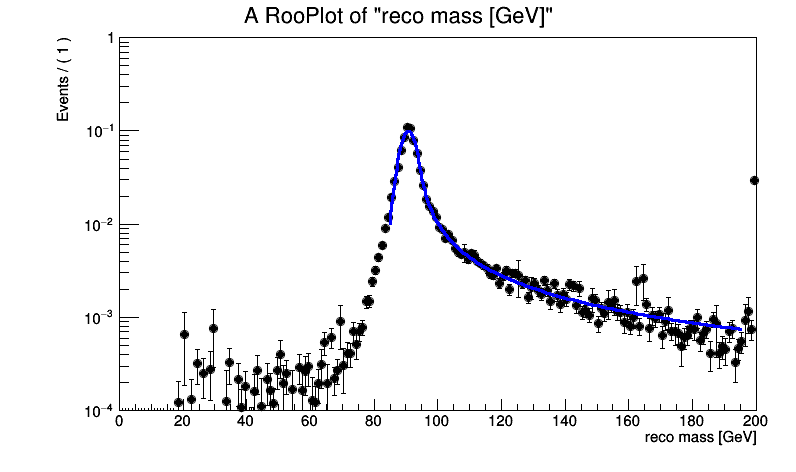

In [23]:
samples.curr_canvases["top"].Draw()

In [24]:
frame.SetMaximum(0.15)
samples.curr_canvases["top"].SetLogy(0)

## Crystal Ball: Fit Result in linear scale

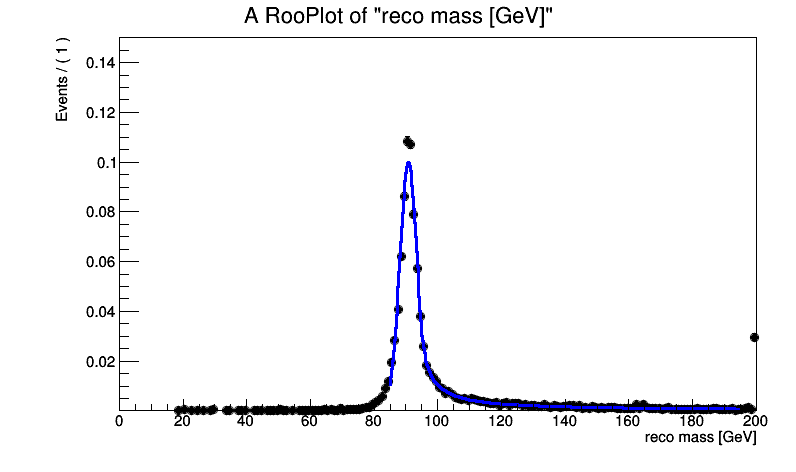

In [25]:
samples.curr_canvases["top"].Draw()

## Double-sided Cystal Ball

For the generation of custom piece-wise function:

run in ROOT CINT interactive and edit `evaluate()`

```RooClassFactory::makePdf("DoubleCB","m,m0,sigma,alpha1,n1,alpha2,n2")``` 

### Compiling source
in pyROOT: `ROOT.gROOT.ProcessLineSync(".x DoubleCB.cxx+") `

In [26]:
ROOT.gROOT.ProcessLineSync(".x DoubleCB.cxx+") 

478639680L

(DoubleCB) Name:  Title: 


In [27]:
dcb_alpha1 = ROOT.RooRealVar("dcb_alpha1","Alpha1",1,0,10)
dcb_alpha2 = ROOT.RooRealVar("dcb_alpha2","Alpha2",1,0,10)
dcb_power1 = ROOT.RooRealVar("dcb_power1","Power1",2,0,10)
dcb_power2 = ROOT.RooRealVar("dcb_power2","Power2",2,0,10)
dcb_sigma  = ROOT.RooRealVar("dcb_sigma" ,"Sigma" ,1,0.1,100)
dcb_m0     = ROOT.RooRealVar("dcb_mass"  ,"Mass"  ,90,80,100)
xx         = ROOT.RooRealVar("xx","reco mass [GeV]",0,200)

In [28]:
dcb_power1.setError( 1. )
dcb_alpha1.setError( 0.05 )
dcb_power2.setError( 1. )
dcb_alpha2.setError( 0.05 )
dcb_sigma.setError( 0.5 )
dcb_m0.setError( 1. )

In [29]:
w = ROOT.RooWorkspace("w")

In [30]:
w.factory("DoubleCB::pdf(xx[70,195],dcb_mass[90,80,100],dcb_sigma[1,0.1,100],dcb_alpha1[1,0,10],"+
          "dcb_power1[1,0,10],dcb_alpha2[1,0,10],dcb_power2[1,0,10])")

<ROOT.DoubleCB object ("pdf") at 0x1c7ebb30>

In [31]:
pdf = w.pdf("pdf")

In [32]:
datahist = ROOT.RooDataHist( 'datahist_dcb', 'data', ROOT.RooArgList(xx), h1 )

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(datahist_dcb): fit range of variable xx expanded to nearest bin boundaries: [0,200] --> [0,200]


In [33]:
dcb_sigma.setVal(0.1)

In [34]:
frame = xx.frame()
datahist.plotOn(frame)
pdf.plotOn(frame)
frame.SetMaximum(0.1)
frame.SetMinimum(0.0001)
frame.Draw()

[#1] INFO:InputArguments -- RooAbsData::plotOn(datahist_dcb) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdf_Int[xx]) using numeric integrator RooIntegrator1D to calculate Int(xx)


## Double Crystal Ball: before fit

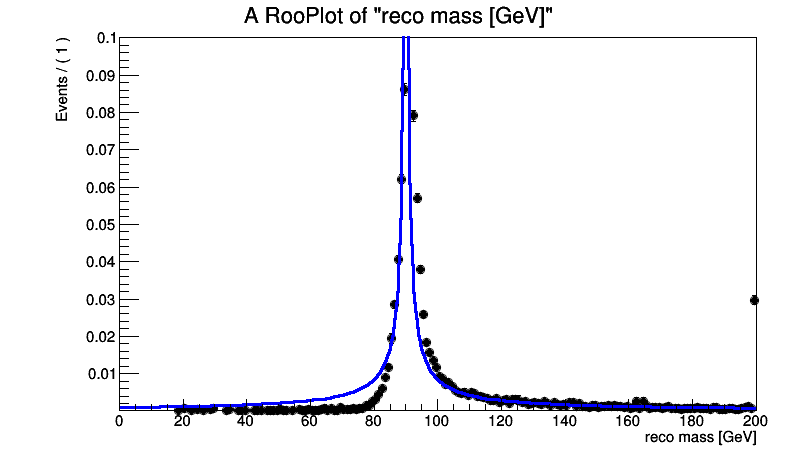

Info in <TCanvas::Print>: png file /tmp/tmpRPlsu5.png has been created


In [35]:
samples.curr_canvases["top"]

In [36]:
pdf.fitTo( datahist, ROOT.RooFit.Range( 70, 195),
                    ROOT.RooFit.SumW2Error(True), ROOT.RooCmdArg( 'Strategy', 3 ) ) 

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Eval -- RooRealVar::setRange(xx) new range named 'fit' created with bounds [70,195]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_pdf_datahist_dcb) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(xx) new range named 'NormalizationRangeForfit' created with bounds [70,195]
[#1] INFO:Eval -- RooRealVar::setRange(xx) new range named 'fit_nll_pdf_datahist_dcb' created with bounds [70,195]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_pdf_datahist_dcb) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdf_Int[xx]) using numeric integrator RooIntegrator1D to calculate Int(xx)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS

In [37]:
frame = xx.frame()
datahist.plotOn(frame)
pdf.plotOn(frame)
frame.SetMaximum(0.15)
frame.SetMinimum(0.0001)
frame.Draw()

[#1] INFO:InputArguments -- RooAbsData::plotOn(datahist_dcb) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) only plotting range 'fit_nll_pdf_datahist_dcb'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_pdf_datahist_dcb'
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdf_Int[xx]) using numeric integrator RooIntegrator1D to calculate Int(xx)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdf_Int[xx|fit_nll_pdf_datahist_dcb]_Norm[xx]) using numeric integrator RooIntegrator1D to calculate Int(xx)


## Double Crystal Ball: after fit

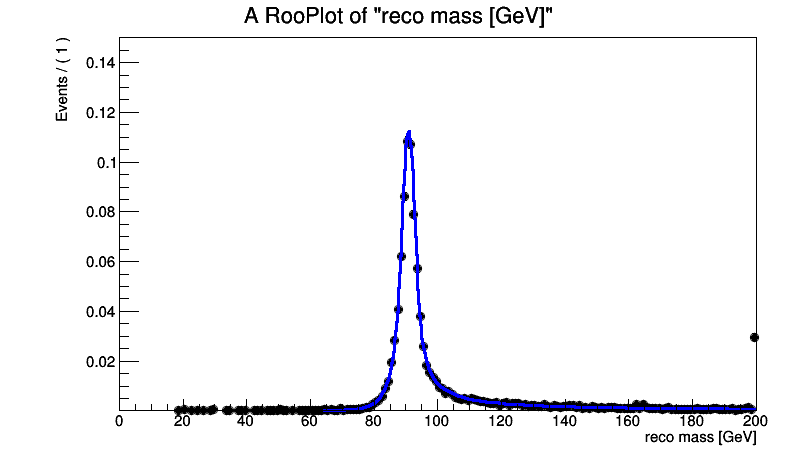

Info in <TCanvas::Print>: png file /tmp/tmp39lW9p.png has been created


In [38]:
samples.curr_canvases["top"]

In [39]:
samples.curr_canvases["top"].SetLogy()

## Double Crystal Ball: after fit

In [40]:
%jsroot on
samples.curr_canvases["top"].Draw()

## Conclusion

- sucessfully fitted crystal ball and double crystal ball
- This needs to be incorporated into FitManager.py

documentation: http://hepcms-hn.umd.edu/~kakw/2018_09_26_FitManager_Test.html

#   

#   

#   

#   

# BACKUP

#   




|          |  MET<25   |MET>25, inv Z cut  |
|----------|-----------|-----------|
|pass eVeto|A          |Signal     |
|fail eVeto|B          | D         |

In [45]:
!bash /home/kakw/forjupyter/jupyterconvert.sh /home/kakw/public_html/ 2018_09_26_FitManager_Test.ipynb

**** Following environment variables are going to be unset.
       DBS_CLIENT_CONFIG
       DBSCMD_HOME
       PYTHON_VALGRIND_SUPP
[NbConvertApp] Converting notebook 2018_09_26_FitManager_Test.ipynb to slides
[NbConvertApp] Writing 758568 bytes to 2018_09_26_FitManager_Test.slides.html
[NbConvertApp] Converting notebook 2018_09_26_FitManager_Test.ipynb to html
[NbConvertApp] Writing 799542 bytes to 2018_09_26_FitManager_Test.html
Thu Sep 27 19:40:47 EDT 2018


In [42]:
import SampleManager; reload(SampleManager);

In [19]:
display(Math(r"f(x;\alpha,n,x,\sigma) = \begin{cases}"
             r"\text{exp}\left(-\frac{(x-x_{0})^{2}}{2\sigma^{2}}\right)&\text{for  }x-x_{0}<\alpha\sigma \\"
             r"A\left(B-\frac{x-x_{0}}{\sigma}\right)&\text{for  }x-x_{0}\geq\alpha\sigma\end{cases}"))

<IPython.core.display.Math object>